<a href="https://colab.research.google.com/github/Ind2221/SECB4313_BMS/blob/main/Heart_Disease_NN_Indradevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = '/content/gdrive/MyDrive/SECB4313 BM&S/Exercise 1/'
model_loc = '/content/gdrive/MyDrive/SECB4313 BM&S/Exercise 1/'

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

['heart.csv', 'Heart_Disease_NN_Indradevi.ipynb']


In [6]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

data.head() #displays the frist 5 rows of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

# The code converts the data type to 'object' to treat them as categorical variables,
# enhancing data manipulation, analysis, and interpretation capabilities.

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [8]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

In [9]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

# Line 3 extracts the values from the 'target' column of the DataFrame 'data' and assigns them to
# the variable 'y', typically representing the target variable in a supervised learning problem.

# Line 4 modifies the shape of 'y' using the `reshape()` function, transforming it into a column vector
# with the same number of rows as the original 'y' but with only one column. This adjustment is typically
# required for compatibility with certain machine learning algorithms.

# Line 5 creates a new DataFrame 'x' by removing the 'target' column from the original DataFrame 'data',
# effectively extracting only the independent variables for analysis, excluding the target variable.

#print shape x and y
print('shape x : ', x.shape)
print('shape x : ', y.shape)

shape x :  (303, 21)
shape x :  (303, 1)


In [10]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

# Create simple dataset
data = pd.DataFrame({'A':[10,20,30], 'B':[100,200,300], 'C':[1000,2000,3000]})
print('Original dataset:')
print(data)

# Normalization
minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
# print(data_norm)

data_norm_rounded = data_norm.round(decimals=1)  # rounding to 1 decimal point
print(data_norm_rounded)

Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
     A    B    C
0  0.0  0.0  0.3
1  0.0  0.1  0.7
2  0.0  0.1  1.0


In [11]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

# Answer : The dataset has been standardized to the range of 0 to 1 through min-max normalization.
# Each value in the dataset now represents the proportion of the original value relative to the
# range of values in its respective column after normalization, ensuring that all features are on a similar scale.

,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.111702,0.257092,0.413121,0.265957,0.004078,0.000000,0.001773,0.000000,0.000000,0.001773,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.001773,0.000000,0.0
1,0.065603,0.230496,0.443262,0.331560,0.006206,0.000000,0.001773,0.000000,0.001773,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
2,0.072695,0.230496,0.361702,0.304965,0.002482,0.003546,0.000000,0.001773,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
3,0.099291,0.212766,0.418440,0.315603,0.001418,0.003546,0.001773,0.001773,0.000000,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
4,0.101064,0.212766,0.627660,0.289007,0.001064,0.003546,0.000000,0.000000,0.000000,0.000000,...,0.001773,0.0,0.001773,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0


In [12]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 21)
(55, 21)
(31, 21)


In [13]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

# The input layer, with 64 neurons and softmax activation, processes 21 features into probabilities,
# vital for multi-class classification by ensuring outputs sum to 1.

# The hidden layer, containing 32 neurons with softmax activation, processes input from the preceding layer,
# generating output by applying transformations and utilizing softmax activation to capture complex patterns in the data,
# functioning as an intermediary within the neural network.

# The output layer, featuring 1 neuron with sigmoid activation, generates the final network output by producing a
# probability value between 0 and 1, ideal for binary classification tasks, aiming to predict the probability of
# sample belonging to a specific class.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# MSE - Mean Squared Error measures the difference between the predicted values and the actual values,
# making larger errors more prominent, commonly used for regression problems.

# Adam optimizer with Learning Rate 0.01 adjusts the weights of the neural network
# during training to minimize the loss function by adapting to the learning rate
# for each parameter, allowing for faster convergence and efficient optimization.
# The learning rate of 0.01 specifies how quickly the model adapts to the training data.

# Accuracy is a metric that evaluates the performance of the model during training
# and validation. Accuracy measures the proportion of correctly classified instances
# out of the total instances, which is relevant for classification tasks.
# It helps in assessing how well the model predicts the correct class labels.

In [15]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 1s 20ms/step - loss: 0.2501 - acc: 0.5438 - val_loss: 0.2479 - val_acc: 0.5455
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2482 - acc: 0.5438 - val_loss: 0.2479 - val_acc: 0.5455
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2481 - acc: 0.5438 - val_loss: 0.2480 - val_acc: 0.5455
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2484 - acc: 0.5438 - val_loss: 0.2481 - val_acc: 0.5455
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2485 - acc: 0.5438 - val_loss: 0.2480 - val_acc: 0.5455
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2483 - acc: 0.5438 - val_loss: 0.2479 - val_acc: 0.5455
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2483 - acc: 0.5438 - val_loss: 0.2480 - val_acc: 0.5455
Epoch 8/1000
14/14 [==============================] - 0s 5ms/step - loss: 0

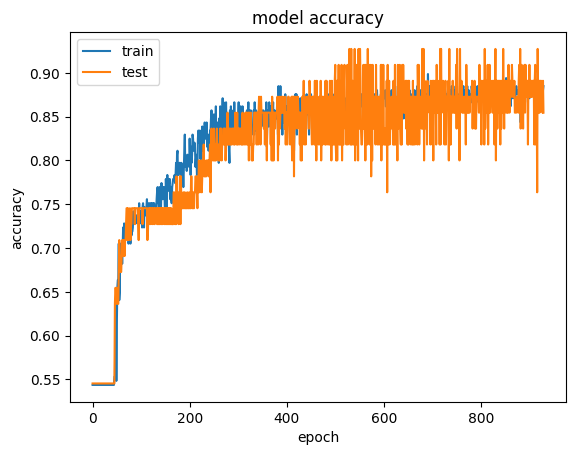

In [20]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

# The plot generated by this code represents the model's accuracy over training epochs.
# The x-axis represents the epoch number, while the y-axis represents the accuracy.
# Two lines are displayed: one for training accuracy (`output.history['acc']`) and
# another for validation accuracy (`output.history['val_acc']`). This plot allows for
# the visualization of how the model's accuracy changes over the course of training and validation epochs.

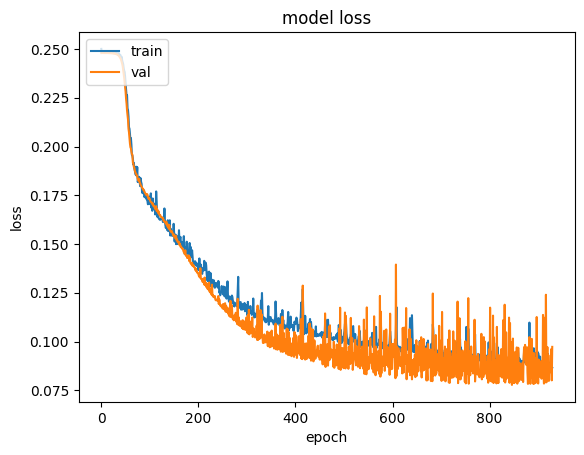

In [21]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

In [22]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

# Evaluating the model on the test dataset assesses its performance on unseen data,
# providing insights into its generalization ability and effectiveness in real-world scenarios.

1/1 [==============================] - 0s 26ms/step - loss: 0.1389 - acc: 0.8387

acc: 83.87%
loss: 0.14


In [23]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 89ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

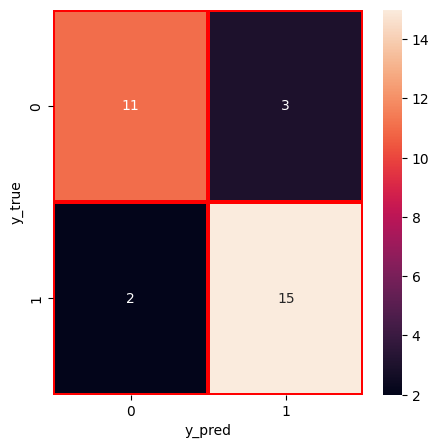


              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



In [24]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Question 15 Confusion Matrix
# A Confusion Matrix is a table that evaluates a classification model's performance
# by comparing actual target values with predicted values, categorizing them into four outcomes.
# True Positives (TP): The number of instances correctly predicted as positive by the model.
# False Positives (FP): The number of instances incorrectly predicted as positive by the model.
# False Negatives (FN): The number of instances incorrectly predicted as negative by the model.
# True Negatives (TN): The number of instances correctly predicted as negative by the model.

# Question 16 Classification Report
# The classification report provides a comprehensive summary of the model's performance by
# presenting key metrics such as precision, recall, F1-score, and support for each class.

# Precision: The proportion of true positive predictions among all positive predictions. Class 0 precision is 0.85.
# Recall: The proportion of true positive predictions among all actual positive instances. Class 0 recall is 0.79
# F1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's accuracy. Fro class 0 is 0.81.
# Support: The number of actual occurrences of each class in the test dataset. For class 0 is 14 instances.
# TThe overall accuracy is 0.84, indicating 84% correct predictions.